# Assignment 1: Exploring and Visualizing Data

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
!pip install prettytable
!pip install geopandas

     |████████████████████████████████| 972kB 8.1MB/s 
     |████████████████████████████████| 14.8MB 313kB/s 
     |████████████████████████████████| 6.5MB 39.6MB/s 


In [4]:
#import necessary packages
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import geopandas as gpd
from prettytable import PrettyTable
import seaborn as sns
import sklearn
import math
from datetime import datetime

In [5]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [6]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Colab Notebooks/Week 1/
!pwd
!ls
print('Working Directory')
print(os.getcwd())

/content/gdrive/My Drive/Colab Notebooks/Week 1
/content/gdrive/My Drive/Colab Notebooks/Week 1
Assignment1-GettingStarted.ipynb
COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv
data.csv
Hilderbrand_Assignmnet_1.ipynb
Transformation-MinMaxScaler.pdf
Transformation-StandardScaler.pdf
Transformation-Unscaled.pdf
Working Directory
/content/gdrive/My Drive/Colab Notebooks/Week 1


In [8]:
##### Load Data 
work_dir = " /content/gdrive/My Drive/Colab Notebooks/Week 1/"
df=pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv')

## Exploratory Data Analysis (EDA)

In [9]:
#display the top 5 rows
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,12/14/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,12/13/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/11/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,12/10/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [10]:
#display the last 5 rows
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61895,3/25/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,3/24/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,3/23/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,3/22/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61899,3/21/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [11]:
#summary statistics
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [12]:
#show total number of rows and columns
df.shape

(61900, 12)

In [13]:
#finding null values
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [14]:
#Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 12)


##Preprocess Data for Analysis

In [15]:
#check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [16]:
#convert the dateRep column from object to date type
df['dateRep']=pd.to_datetime(df['dateRep'], format='%m/%d/%Y').dt.strftime('%Y%m%d')
df['dateRep']=pd.to_datetime(df['dateRep'], format='%Y/%m/%d')
df['dateRep'].head()

0   2020-12-14
1   2020-12-13
2   2020-12-12
3   2020-12-11
4   2020-12-10
Name: dateRep, dtype: datetime64[ns]

In [17]:
#check data types to ensure dateRep was converted successfully
df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [18]:
#create new column cases per million
df['cases_per_million'] = df['cases']/(df['popData2019']/100000000)

In [19]:
#create new column deaths per million
df['deaths_per_million'] = df['deaths']/(df['popData2019']/100000000)

In [20]:
#check to make sure new columns were added
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 14 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

##Visualizing Data

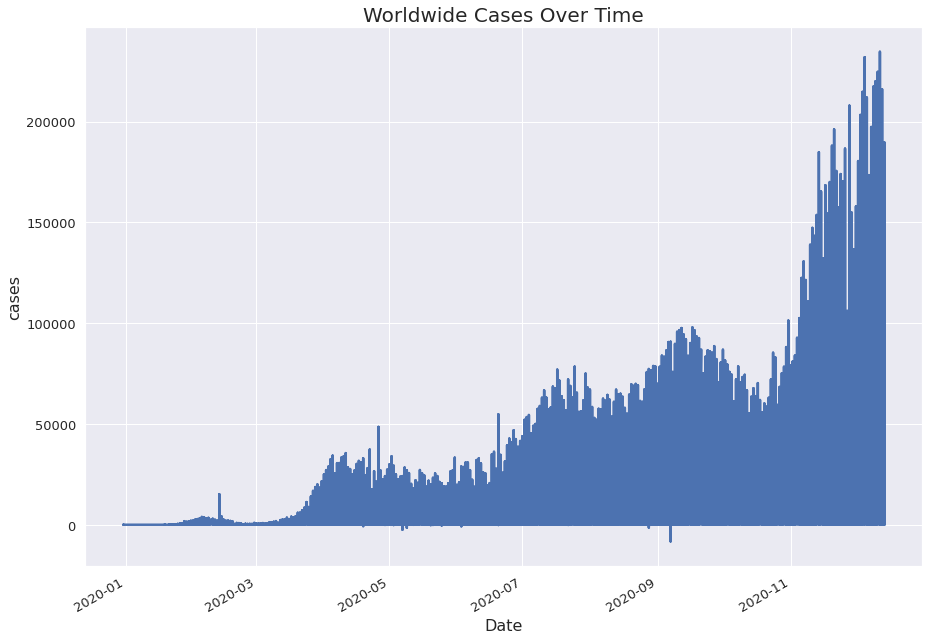

In [21]:
world_daily = df.set_index('dateRep')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['cases'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

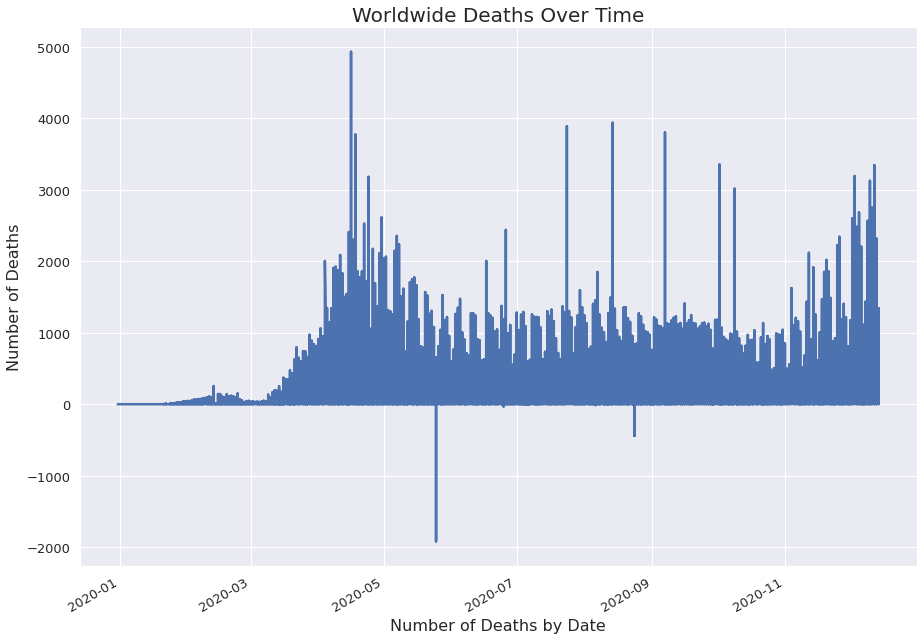

In [22]:
sns.set(rc={'figure.figsize':(15,11)})
world_daily['deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

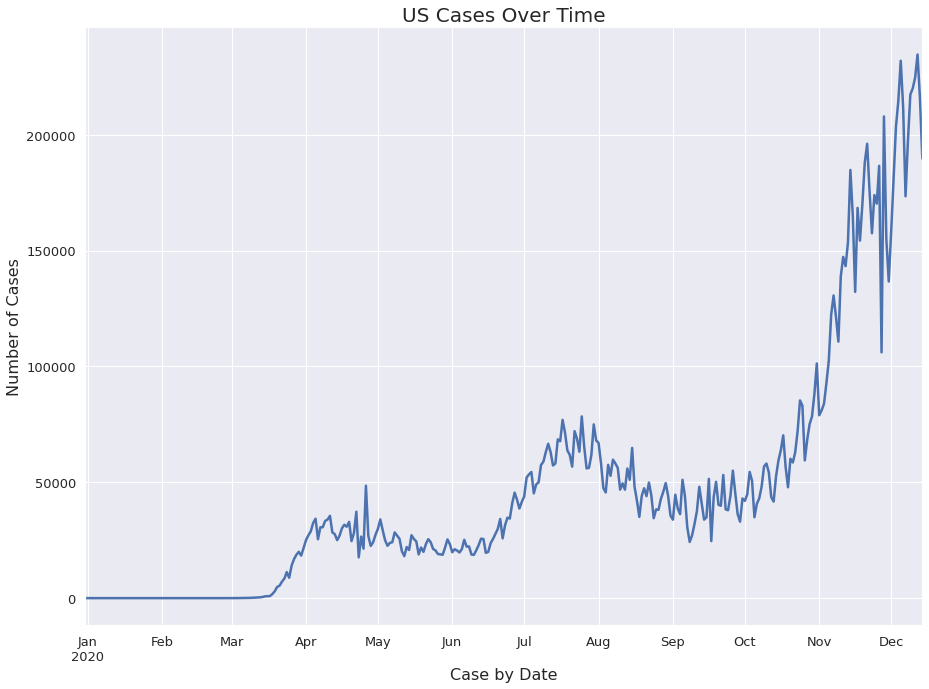

In [23]:
df_usa = df[df["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = df_usa.set_index('dateRep')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cases'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

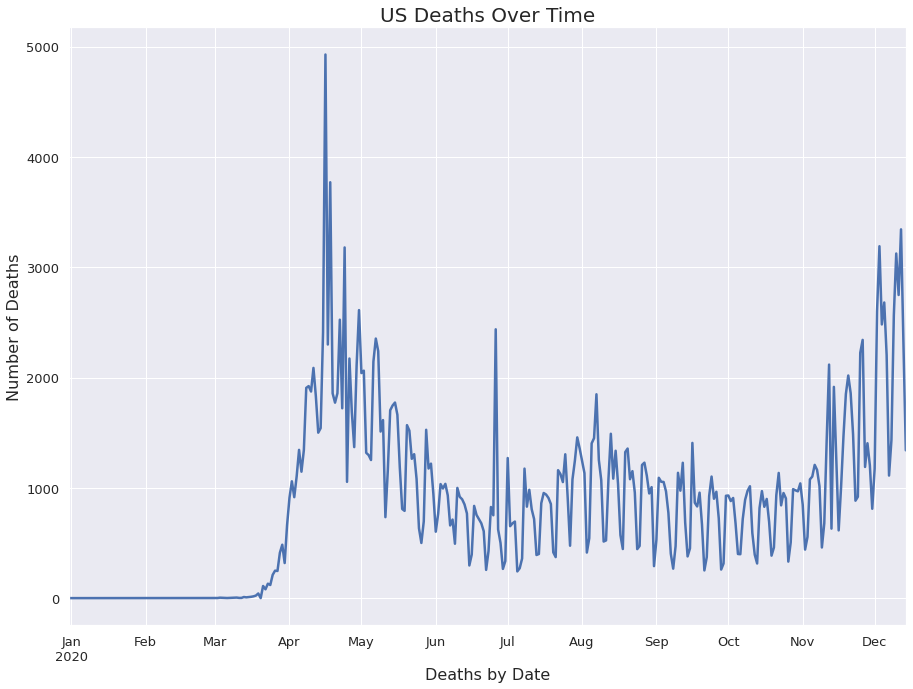

In [24]:
df_usa = df[df["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = df_usa.set_index('dateRep')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['deaths'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

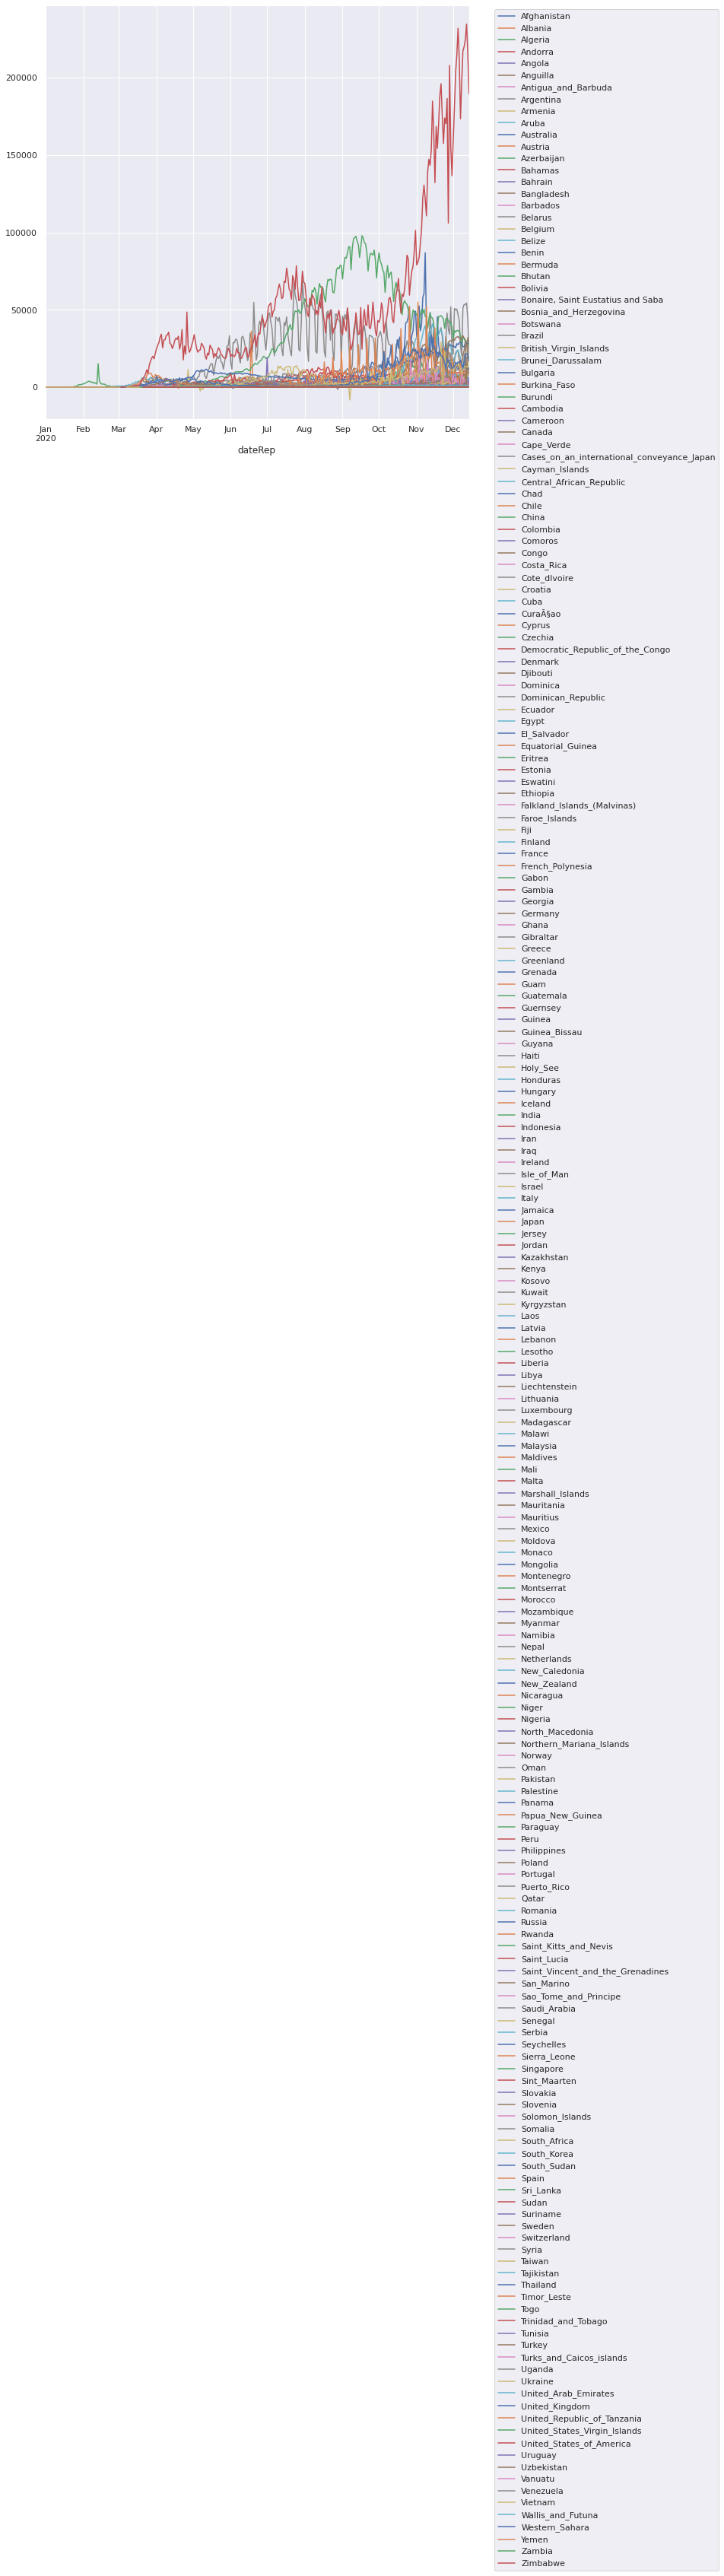

In [25]:
df.pivot(index="dateRep", columns="countriesAndTerritories", values="cases").plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

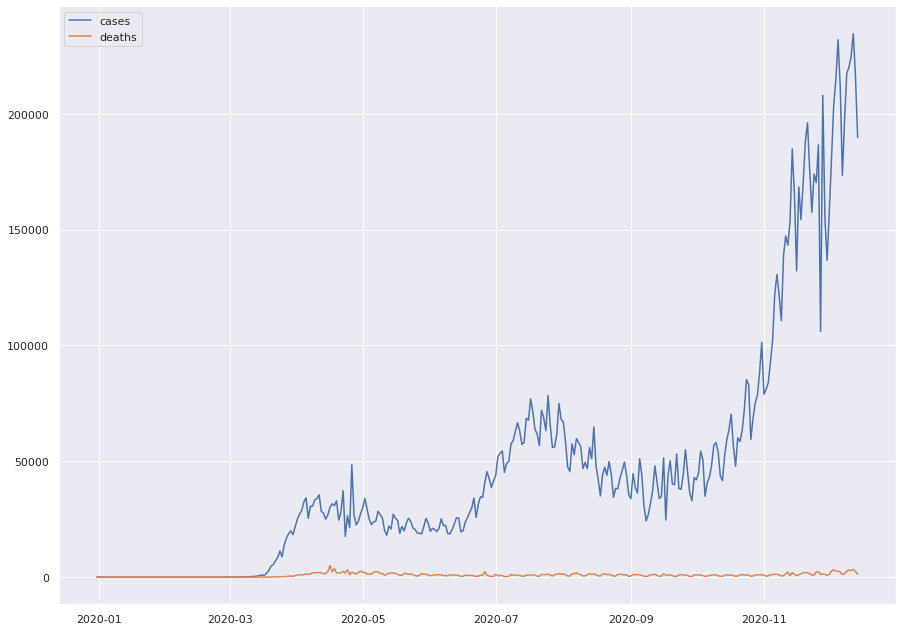

In [26]:
plt.plot('dateRep', 'cases', data=df_usa)
plt.plot('dateRep', 'deaths', data=df_usa)
plt.legend()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_per_million,deaths_per_million
day,1.000000,-0.109482,-0.057227,-0.004040,-0.006628,-0.002848,-0.014133,-0.008061,-0.012122
month,-0.109482,1.000000,-0.054955,0.118790,0.068335,-0.049900,0.310703,0.250622,0.120791
year,-0.057227,-0.054955,1.000000,0.005607,0.006536,-0.010016,NaN,0.010581,0.008228
cases,-0.004040,0.118790,0.005607,1.000000,0.743544,0.308378,0.225204,0.208257,0.144917
deaths,-0.006628,0.068335,0.006536,0.743544,1.000000,0.273159,0.178449,0.147347,0.341300
popData2019,-0.002848,-0.049900,-0.010016,0.308378,0.273159,1.000000,-0.045433,-0.036088,-0.015103
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,-0.014133,0.310703,NaN,0.225204,0.178449,-0.045433,1.000000,0.783905,0.444047
cases_per_million,-0.008061,0.250622,0.010581,0.208257,0.147347,-0.036088,0.783905,1.000000,0.390779
deaths_per_million,-0.012122,0.120791,0.008228,0.144917,0.341300,-0.015103,0.444047,0.390779,1.000000


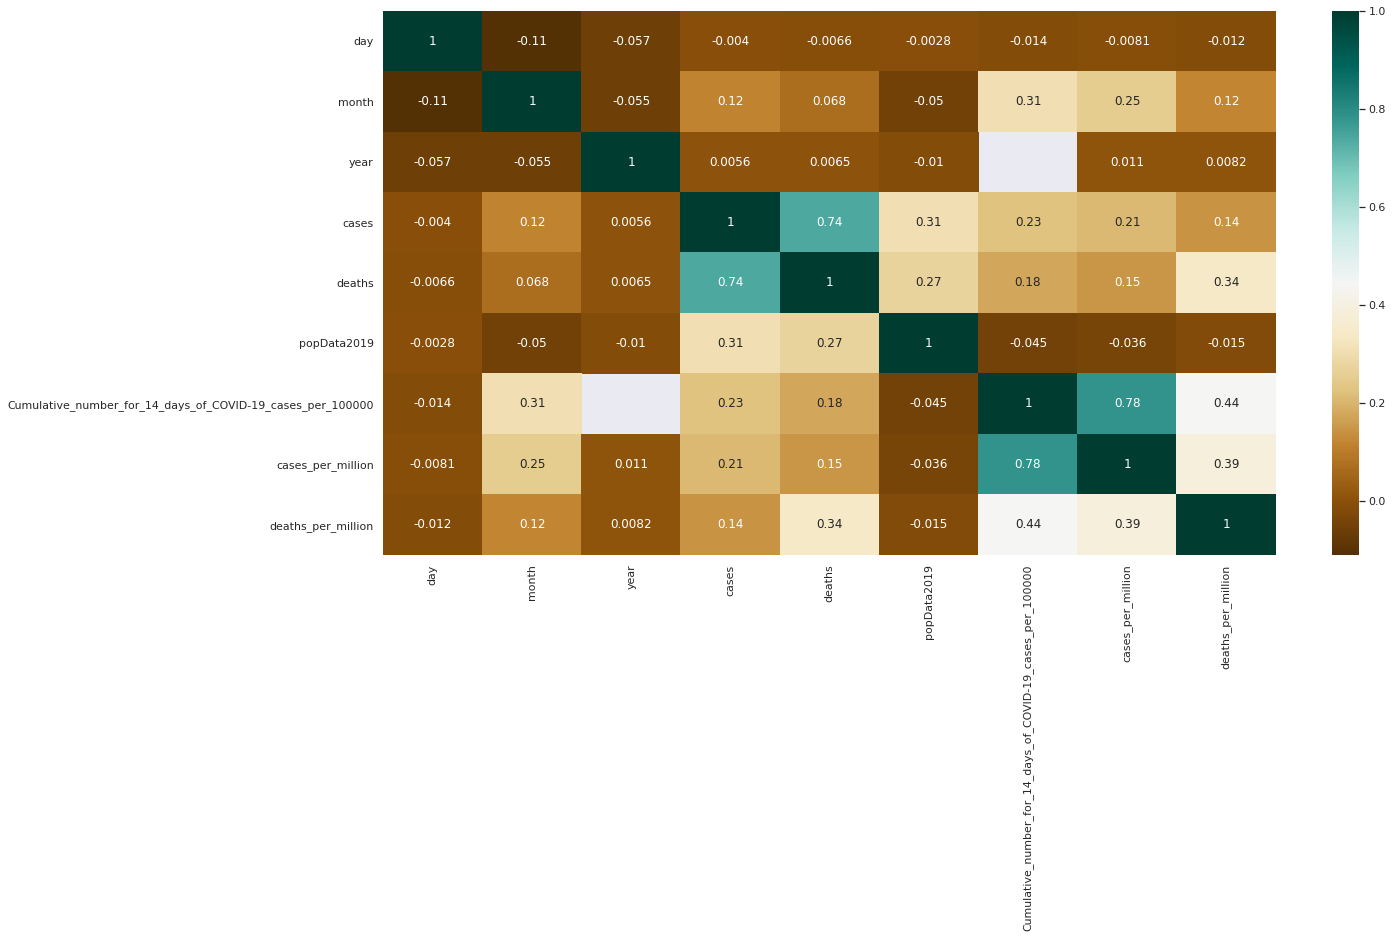

In [27]:
#find the relations between variables
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)
c

,index,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_per_million,deaths_per_million
index,1.000000,-0.015699,-0.979110,-0.092450,-0.799127,-0.442572,NaN,-0.815366,-0.799127,-0.442572
day,-0.015699,1.000000,-0.053325,-0.094228,-0.032545,-0.030561,NaN,-0.047882,-0.032545,-0.030561
month,-0.979110,-0.053325,1.000000,-0.092525,0.791107,0.433908,NaN,0.813354,0.791107,0.433908
year,-0.092450,-0.094228,-0.092525,1.000000,0.048016,0.059962,NaN,NaN,0.048016,0.059962
cases,-0.799127,-0.032545,0.791107,0.048016,1.000000,0.556402,NaN,0.976555,1.000000,0.556402
deaths,-0.442572,-0.030561,0.433908,0.059962,0.556402,1.000000,NaN,0.528919,0.556402,1.000000
popData2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,-0.815366,-0.047882,0.813354,NaN,0.976555,0.528919,NaN,1.000000,0.976555,0.528919
cases_per_million,-0.799127,-0.032545,0.791107,0.048016,1.000000,0.556402,NaN,0.976555,1.000000,0.556402
deaths_per_million,-0.442572,-0.030561,0.433908,0.059962,0.556402,1.000000,NaN,0.528919,0.556402,1.000000


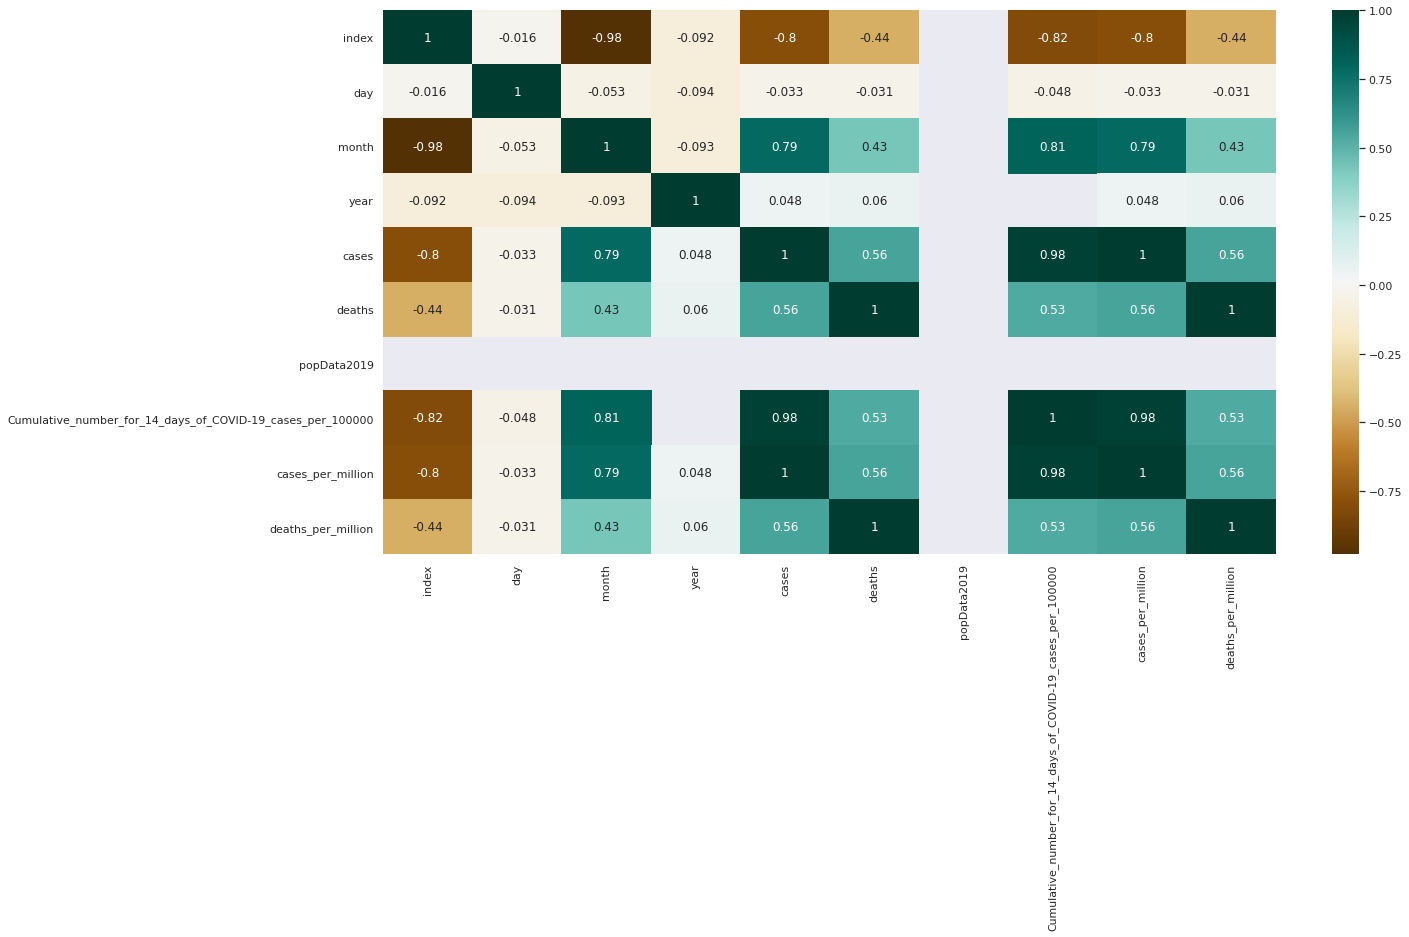

In [37]:
#find the relations between variables for us
plt.figure(figsize=(20,10))
c = df_usa.corr()
sns.heatmap(c,cmap="BrBG", annot=True)
c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5cdb1a6a0>,
      dtype=object)

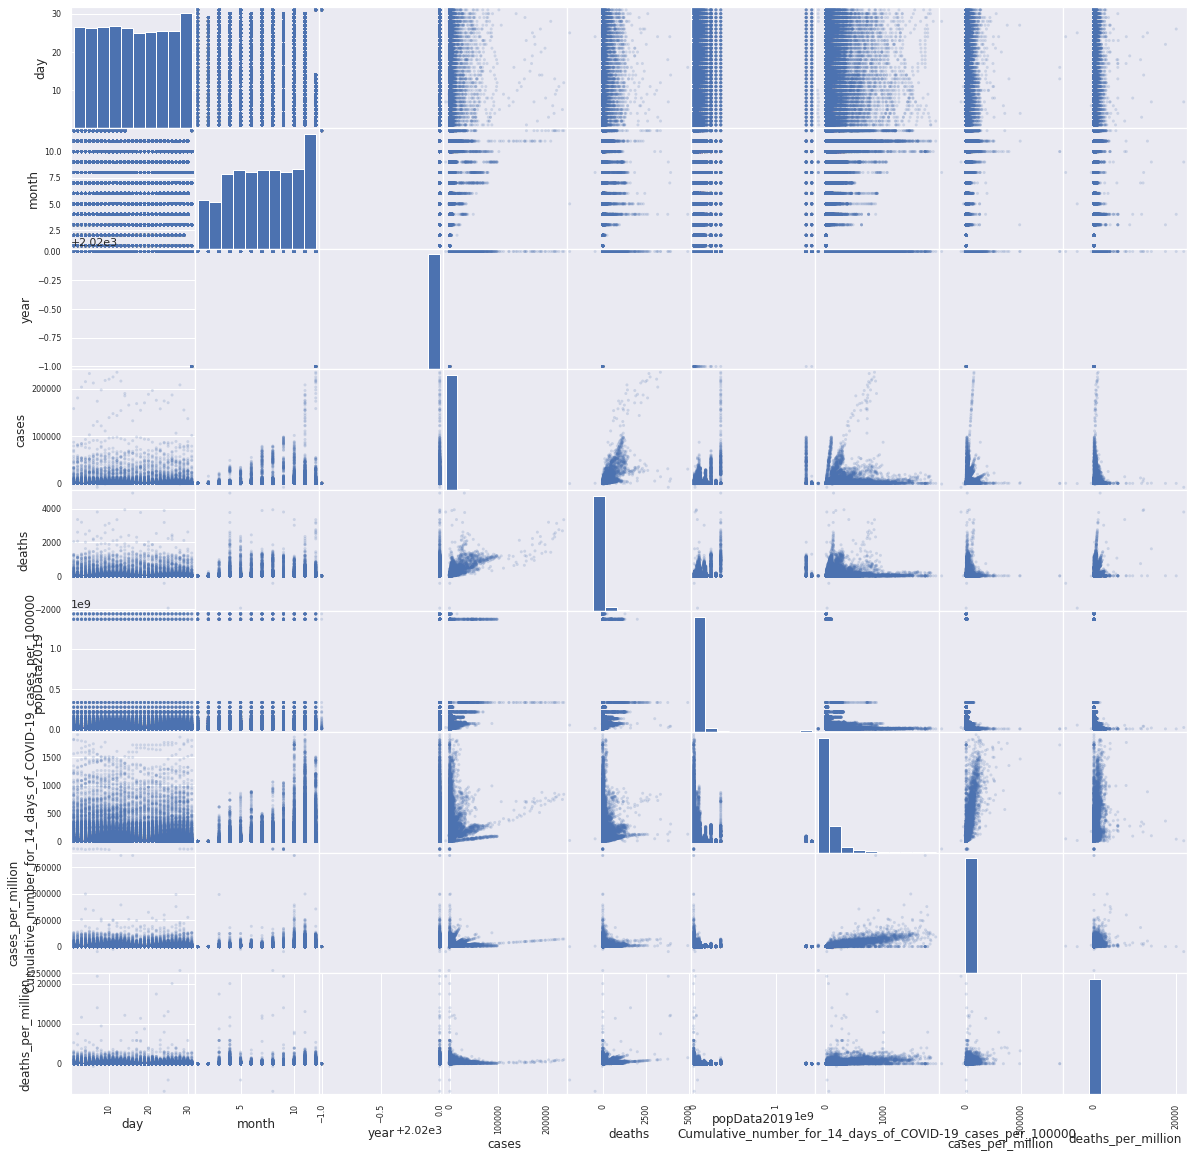

In [29]:
#create a scatter plot matrix
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))

Text(0, 0.5, 'deaths')

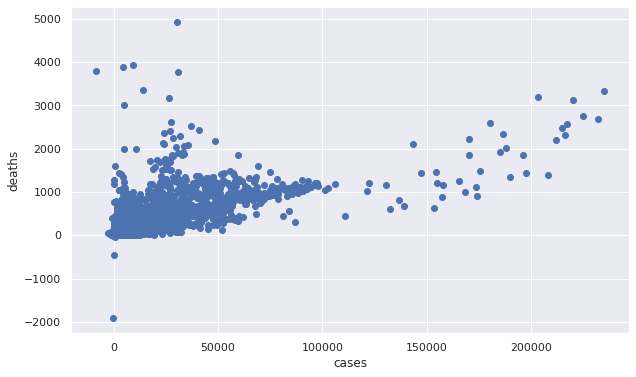

In [30]:
#zoomed in scatter plot between weekly cases and weekly deaths
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['cases'], df['deaths'])
ax.set_xlabel('cases')
ax.set_ylabel('deaths')

Text(0, 0.5, 'deaths')

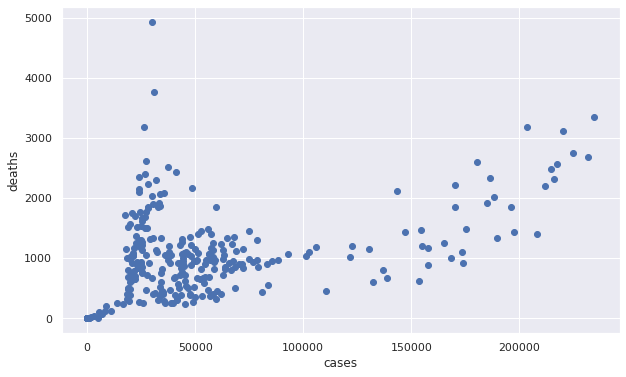

In [31]:
#scatter plot between weekly cases and weekly deaths for usa
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_usa['cases'], df_usa['deaths'])
ax.set_xlabel('cases')
ax.set_ylabel('deaths')

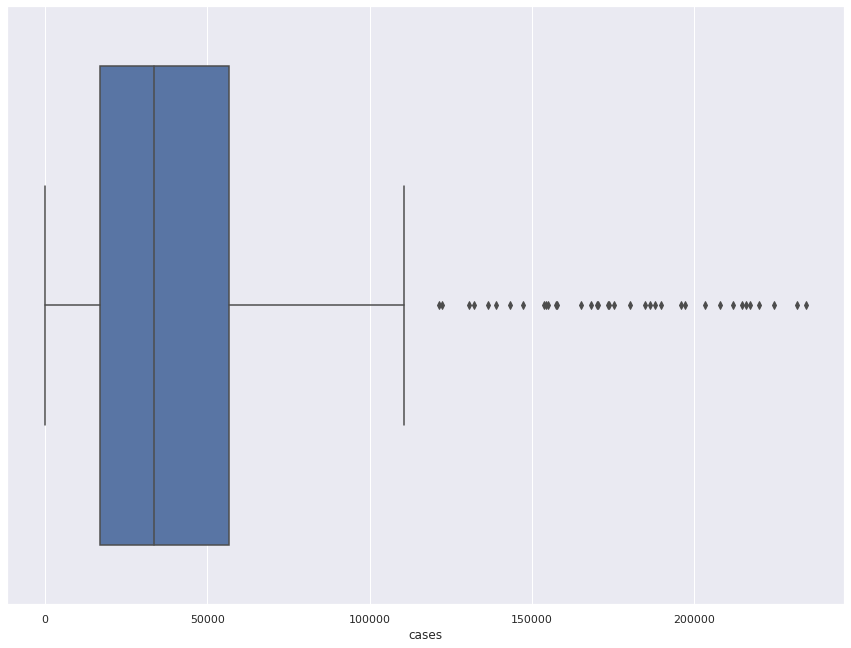

In [32]:
sns.boxplot(x=df_usa['cases'])

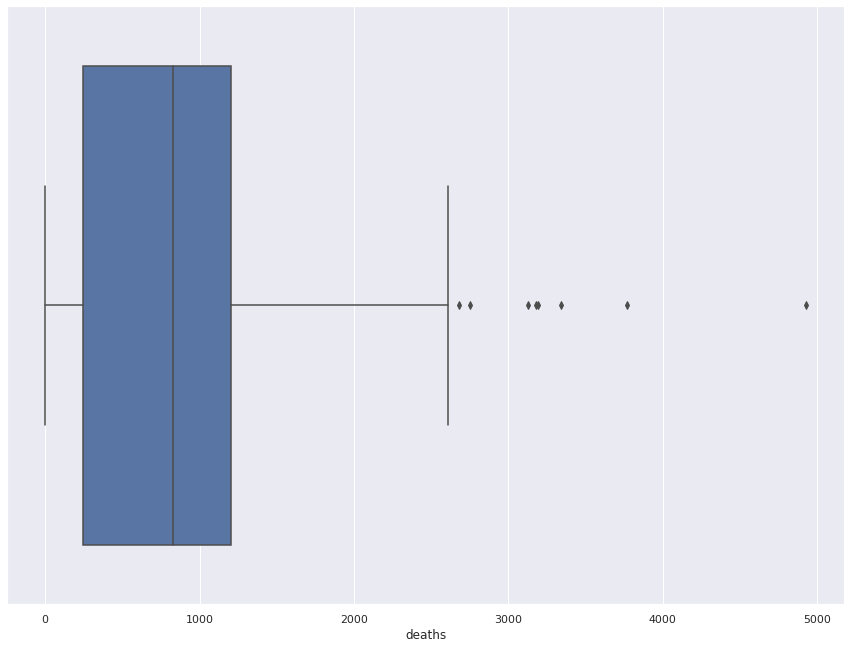

In [33]:
sns.boxplot(x=df_usa['deaths'])

## Scaling Data

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [35]:
cases_daily = pd.DataFrame(df['cases'])
cases_daily = cases_daily.replace(0,1)
cases_daily.describe()

,cases
count,61900.000000
mean,1155.460824
std,6779.171060
min,-8261.000000
25%,1.000000
50%,15.000000
75%,273.000000
max,234633.000000


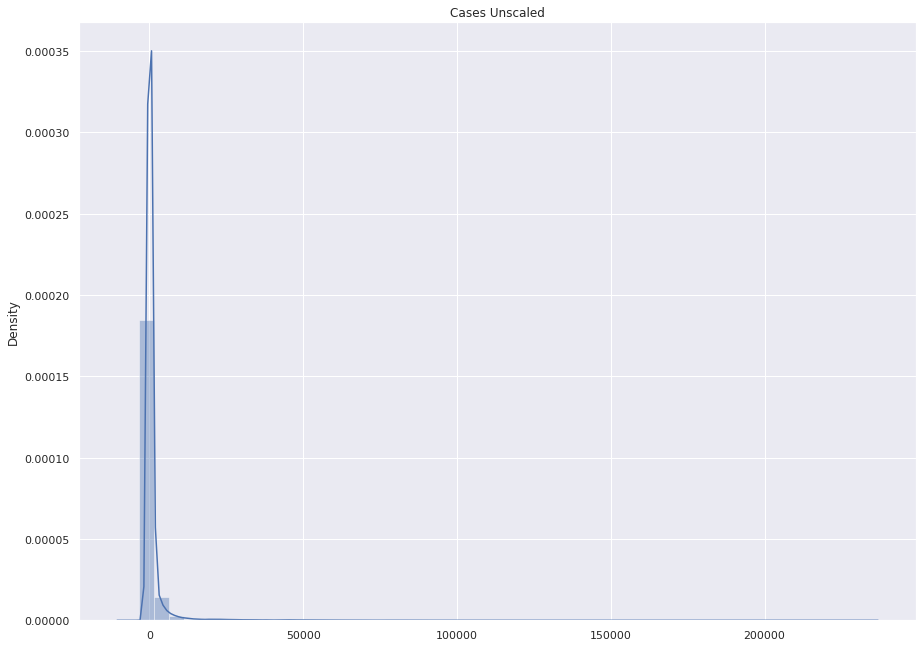

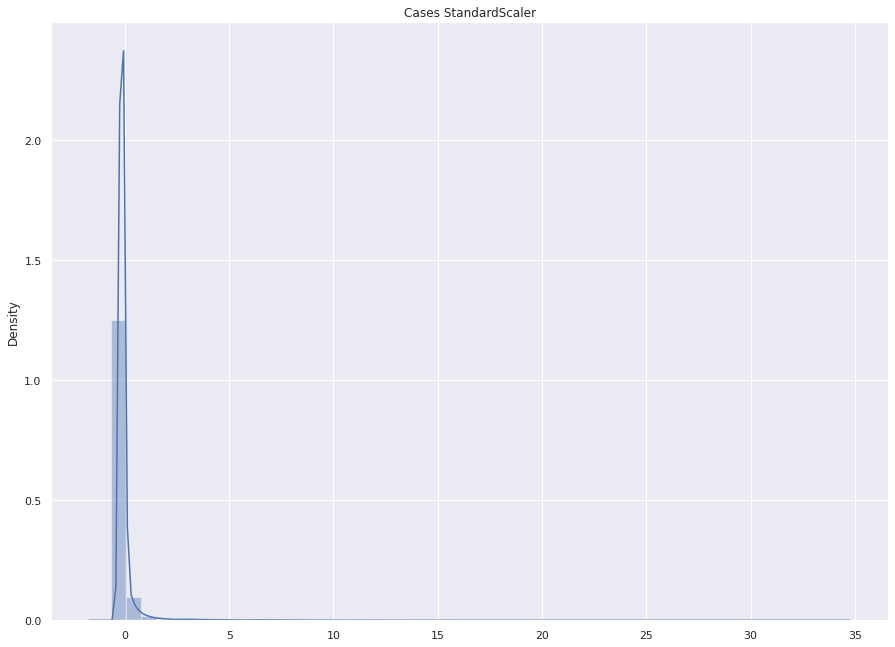

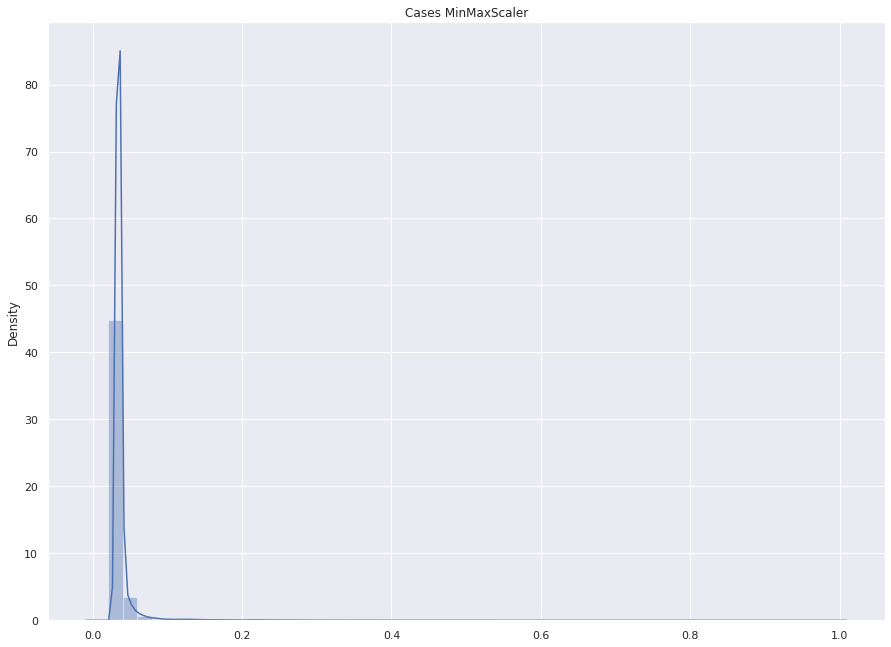

In [36]:
X = cases_daily

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Cases Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('Cases StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(np.array(X).reshape(-1,1))).set_title('Cases MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25) 